<a href="https://colab.research.google.com/github/supatsara2002/bsc_dpdm22/blob/main/midterm_dpdm22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## การเตรียมข้อมูลประกอบด้วย กำจัด outlier, แก้ missing, normalization, one-hot-encoder และ อื่นๆ ที่นักศึกษาเห็นว่าเหมาะสม

# 1 ทำนายราคาบ้าน 10 คะแนน
เตรียมข้อมูลเพื่อทำนายราคาบ้าน ราคาประเมินบ้าน และ คะแนนทรัพย์ จาก [google drive](https://drive.google.com/drive/folders/1uIcUFY1yldIq-A3wijh2n2N6az-EljIe?usp=sharing) โดยข้อมูลที่เตรียมต้องประกอบด้วย columns ต่อไปนี้

* ```'renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price'``` จากตาราง "คำตอบนักประเมิน(ID)"

* ```จำนวน 7-11 และ โรงเรียน ในรัศมี 200,500,1000,2000 เมตร (ตั้งชื่อ d200-7/11','d500-7/11',...,'d2000-7/11' แบะ ;d200-school','d500-school',...,'d2000-school')``` จากตาราง "7-eleven.json" และ "school.json"

* ```ประเมินราคาซื้อขาย และ คะแนนทรัพย์ (ตั้งชื่อ 'estimator' และ 'score')``` จากตาราง คำตอบนักประเมิน(ID) โดยราคาประเมินกับคะแนนทรัพย์ อ้างอิงของนักประเมิน ID=01 คนเดียว

In [ ]:
import pandas as pd
import numpy as np
from pandas.io import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## import file  

In [ ]:
#คำตอบนักประเมิน(ID)
link1 = 'https://docs.google.com/spreadsheets/d/1u9-JTqxFkCzJYPQo-3Dg_GZjfcF_XNDNtf1mtr0dpdI/export?format=xlsx'
detachedhouse = pd.read_excel(link1,sheet_name='บ้าน')

In [ ]:
#Data House
link2 = 'https://docs.google.com/spreadsheets/d/1mY0fjGc5OMCsl6qlaGjfTKGVB3ZE2sFg3QDSdxh2nfY/export?format=xlsx'
H1 = pd.read_excel(link2,sheet_name='บ้านมือ1')
H2 = pd.read_excel(link2,sheet_name='บ้านมือ2')

In [ ]:
#7-eleven.json
with open('/content/drive/MyDrive/Data Prep and Data Mining BSc65/midterm/7-eleven.json') as json_file:
  seven_eleven = json.loads(json_file.read())

In [ ]:
#school.json
with open('/content/drive/MyDrive/Data Prep and Data Mining BSc65/midterm/school.json') as json_file:
  school = json.loads(json_file.read())

##คำตอบนักประเมิน(ID)

In [ ]:
detachedhouse['second_hand'] = 'บ้านมือ 1'

In [ ]:
detachedhouse.head()

,ID ผู้ประเมิน,post id,ID,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,second_hand
0,1.0,https://nayoo.co/khonkaen/posts/25,25.0,บ้านเดี่ยว,มั่นใจ,2890000.0,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,บ้านมือ 1
1,2.0,https://nayoo.co/khonkaen/posts/25,25.0,บ้านเดี่ยว,มั่นใจ,2890000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,บ้านมือ 1
2,1.0,https://nayoo.co/khonkaen/posts/33,33.0,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,บ้านมือ 1
3,2.0,https://nayoo.co/khonkaen/posts/33,33.0,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,บ้านมือ 1
4,1.0,https://nayoo.co/khonkaen/posts/495,495.0,บ้านเดี่ยว,มั่นใจ,6050000.0,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,บ้านมือ 1


###แก้ Missing

In [ ]:
detachedhouse.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
ID                                False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                         True
ประเมินราคาซื้อ-ขาย                True
ปัจจัยในการประเมินราคาซื้อ-ขาย     True
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                     True
second_hand                       False
dtype: bool

In [ ]:
# ราคาทรัพย์, ประเมินราคาซื้อ-ขาย
# เลือก Dropna เนื่องจากราคาทรัพย์และประเมินราคาซื้อ-ขาย ไม่สามารถแทนด้วยค่าเฉลี่ยหรือแทนด้วย 0 ได้ เพราะจะทำให้ความหมายเปลี่ยน
detachedhouse.dropna(subset=['ราคาทรัพย์'],inplace=True)
detachedhouse.dropna(subset=['ประเมินราคาซื้อ-ขาย'],inplace=True)

In [ ]:
# ปัจจัยในการประเมินราคาซื้อ-ขาย, เหตุผลไม่มั่นใจราคาประเมิน, ให้คะแนนทรัพย์
# fillna ด้วยไม่มีฐานข้อมูล เนื่องจากถ้าเหตุผลไม่มั่นใจราคาประเมินไม่มีฐานข้อมูล(ก็คือกรอกไม่มั่นใจ) ทำให้ปัจจัยในการประเมินราคาซื้อ-ขายและให้คะแนนทรัพย์ไม่มีข้อมูลไปด้วย
detachedhouse['ปัจจัยในการประเมินราคาซื้อ-ขาย'] = detachedhouse['ปัจจัยในการประเมินราคาซื้อ-ขาย'].fillna('ไม่มีฐานข้อมูล') 
detachedhouse['ให้คะแนนทรัพย์'] = detachedhouse['ให้คะแนนทรัพย์'].fillna('ไม่มีฐานข้อมูล') 
# fillna ด้วยไม่มี เนื่องจากถ้ากรอกว่ามั่นใจจะทำให้คอลัมน์เหตุผลไม่มั่นใจราคาประเมินไม่มีข้อมูลของการไม่มั่นใจ
detachedhouse['เหตุผลไม่มั่นใจราคาประเมิน'] = detachedhouse['เหตุผลไม่มั่นใจราคาประเมิน'].fillna('ไม่มี') 


In [ ]:
detachedhouse.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
ID                                False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมินราคาซื้อ-ขาย               False
ปัจจัยในการประเมินราคาซื้อ-ขาย    False
เหตุผลไม่มั่นใจราคาประเมิน        False
ให้คะแนนทรัพย์                    False
second_hand                       False
dtype: bool

##Data House

In [ ]:
H1['second_hand'] = 'บ้านมือ 1'
H2['second_hand'] = 'บ้านมือ 2'

In [ ]:
table2 = pd.concat([H1, H2],ignore_index=True,sort=False)
table2.head()

,id,parent_id,project_name,province,district,sub_district,zip_code,zone_id,zone,property_type,...,land wide(m),land long(m),topsoil,corner,alley,has_pool,has_keycard,has_security,has_fitness,has_garden
0,314.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,315.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านแฝด,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,316.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,317.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,318.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
home = table2[['id','latitude','longitude','renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price','second_hand']]
home.head()

,id,latitude,longitude,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand
0,314.0,16.392304,102.827926,NaN,NaN,NaN,50.00,2.0,4.0,3.0,0.0,0.0,185.0,2.0,3950000.0,บ้านมือ 1
1,315.0,16.392304,102.827926,NaN,NaN,NaN,40.00,2.0,4.0,3.0,0.0,0.0,165.0,2.0,3250000.0,บ้านมือ 1
2,316.0,16.392304,102.827926,NaN,NaN,NaN,77.25,2.0,4.0,3.0,0.0,0.0,260.0,2.0,6300000.0,บ้านมือ 1
3,317.0,16.392304,102.827926,NaN,NaN,NaN,81.25,2.0,6.0,5.0,0.0,0.0,343.0,3.0,6900000.0,บ้านมือ 1
4,318.0,16.392304,102.827926,NaN,NaN,NaN,55.00,2.0,4.0,4.0,0.0,0.0,223.0,2.0,4490000.0,บ้านมือ 1


### แก้ Missing

In [ ]:
home.isnull().any()

id                    False
latitude               True
longitude              True
renovate               True
number_of_rai          True
number_of_ngan         True
number_of_va           True
number_of_story        True
number_of_bedroom      True
number_of_bathroom     True
direction              True
furniture              True
usable_area            True
number_of_parking      True
sell_price             True
second_hand           False
dtype: bool

In [ ]:
home['direction'] = home['direction'].apply(np.str0)  
home['furniture'] = home['furniture'].apply(np.str0)  

In [ ]:
# แทนที่ 0.0 ด้วยไม่ระบุ เนื่องจากจะเปลี่ยนให้บ้านมือ1 เหมือนบ้านมือ2
home['direction'] = home['direction'].replace("0.0","ไม่ระบุ") 
home['furniture'] = home['furniture'].replace("0.0","ไม่ระบุ") 

In [ ]:
# fillna
home['renovate'] = home['renovate'].fillna('ไม่ระบุ') # fillna ด้วยไม่ระบุ
home['direction'] = home['direction'].fillna('ไม่ระบุ') # fillna ด้วยไม่ระบุสำหรับค่าว่าง
home['furniture'] = home['furniture'].fillna('ไม่ระบุ') # fillna ด้วยไม่ระบุสำหรับค่าว่าง
home[['number_of_rai', 'number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','furniture','usable_area','number_of_parking']]  = home[['number_of_rai', 'number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','furniture','usable_area','number_of_parking']].fillna(0) # fillna ด้วย 0 ในคอลัมน์ที่ไม่ม่ เช่น ที่จอดรถ

In [ ]:
# dropna sell_price,latitude,longitude เนื่องจากหากเลือกแทนด้วยค่าเฉลี่ยหรือแทนด้วยตัวเลขจะทำให้ความหมายเปลี่ยน
home.dropna(subset=['sell_price'],inplace=True)
home.dropna(subset=['latitude'],inplace=True)
home.dropna(subset=['longitude'],inplace=True)

In [ ]:
home.head()

,id,latitude,longitude,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand
0,314.0,16.392304,102.827926,ไม่ระบุ,0.0,0.0,50.00,2.0,4.0,3.0,ไม่ระบุ,ไม่ระบุ,185.0,2.0,3950000.0,บ้านมือ 1
1,315.0,16.392304,102.827926,ไม่ระบุ,0.0,0.0,40.00,2.0,4.0,3.0,ไม่ระบุ,ไม่ระบุ,165.0,2.0,3250000.0,บ้านมือ 1
2,316.0,16.392304,102.827926,ไม่ระบุ,0.0,0.0,77.25,2.0,4.0,3.0,ไม่ระบุ,ไม่ระบุ,260.0,2.0,6300000.0,บ้านมือ 1
3,317.0,16.392304,102.827926,ไม่ระบุ,0.0,0.0,81.25,2.0,6.0,5.0,ไม่ระบุ,ไม่ระบุ,343.0,3.0,6900000.0,บ้านมือ 1
4,318.0,16.392304,102.827926,ไม่ระบุ,0.0,0.0,55.00,2.0,4.0,4.0,ไม่ระบุ,ไม่ระบุ,223.0,2.0,4490000.0,บ้านมือ 1


In [ ]:
home.dtypes

id                     object
latitude              float64
longitude             float64
renovate               object
number_of_rai         float64
number_of_ngan        float64
number_of_va          float64
number_of_story       float64
number_of_bedroom     float64
number_of_bathroom    float64
direction              object
furniture              object
usable_area           float64
number_of_parking     float64
sell_price            float64
second_hand            object
dtype: object

In [ ]:
# เปลี่ยน data type
home['number_of_rai'] = home['number_of_rai'].apply(np.int64)
home['number_of_ngan'] = home['number_of_ngan'].apply(np.int64)
home['number_of_va'] = home['number_of_va'].apply(np.int64)
home['number_of_story'] = home['number_of_story'].apply(np.int64)
home['number_of_bedroom'] = home['number_of_bedroom'].apply(np.int64)
home['number_of_bathroom'] = home['number_of_bathroom'].apply(np.int64)
home['usable_area'] = home['usable_area'].apply(np.int64)
home['number_of_parking'] = home['number_of_parking'].apply(np.int64)
home['sell_price'] = home['sell_price'].apply(np.int64)  

In [ ]:
home.dtypes

id                     object
latitude              float64
longitude             float64
renovate               object
number_of_rai           int64
number_of_ngan          int64
number_of_va            int64
number_of_story         int64
number_of_bedroom       int64
number_of_bathroom      int64
direction              object
furniture              object
usable_area             int64
number_of_parking       int64
sell_price              int64
second_hand            object
dtype: object

In [ ]:
home.head()

,id,latitude,longitude,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand
0,314.0,16.392304,102.827926,ไม่ระบุ,0,0,50,2,4,3,ไม่ระบุ,ไม่ระบุ,185,2,3950000,บ้านมือ 1
1,315.0,16.392304,102.827926,ไม่ระบุ,0,0,40,2,4,3,ไม่ระบุ,ไม่ระบุ,165,2,3250000,บ้านมือ 1
2,316.0,16.392304,102.827926,ไม่ระบุ,0,0,77,2,4,3,ไม่ระบุ,ไม่ระบุ,260,2,6300000,บ้านมือ 1
3,317.0,16.392304,102.827926,ไม่ระบุ,0,0,81,2,6,5,ไม่ระบุ,ไม่ระบุ,343,3,6900000,บ้านมือ 1
4,318.0,16.392304,102.827926,ไม่ระบุ,0,0,55,2,4,4,ไม่ระบุ,ไม่ระบุ,223,2,4490000,บ้านมือ 1


##seven

In [ ]:
import geopy.distance

In [ ]:
seven_id = {} #สร้างdictionary ขึ้นมาเก็บจะได้ดึงข้อมูลมาเปรียบเทียบกันได้
for t in seven_eleven:
    l = list()
    for x in seven_eleven[t]:
        l.append(x['geometry']['location'])
    #print(t) #ID
    #print(l)
    seven_id[t]=l #seven_id ที่มีID คือ t มีสมาชิกคือ l

In [ ]:
for z in home['id'].keys():
  print(z)

In [ ]:
for x in seven_id.keys():
  print(x)

In [ ]:
#เพิ่มคีย์ 314 และค่า 0 เข้าไปยัง seven_id
seven_id['314'] = '0' 

In [ ]:
record_list = []
for id in home['id']:
    try:
        id_int = int(id)
    except ValueError:
        continue

    this_home = home[home['id'] == id_int]
    h_lat = this_home['latitude'].values[0]
    h_long = this_home['longitude'].values[0]
    this_seven_id = seven_id.get(str(id_int), [])
    if not this_seven_id:
        continue
    seven_dist = []
    loc1 = [h_lat, h_long]
    for seven in this_seven_id:
        loc2 = [seven['lat'], seven['lng']]
        dist = geopy.distance.geodesic(loc1, loc2).m
        seven_dist.append(dist)
    record_dict = {}
    record_dict['id'] = id_int
    record_dict['d200-7/11'] = sum(np.array(seven_dist) < 200)
    record_dict['d500-7/11'] = sum(np.array(seven_dist) < 500)
    record_dict['d1000-7/11'] = sum(np.array(seven_dist) < 1000)
    record_dict['d2000-7/11'] = sum(np.array(seven_dist) < 2000)
    record_list.append(record_dict)
seven_table = pd.DataFrame(record_list)

In [ ]:
seven_table.head()

,id,d200-7/11,d500-7/11,d1000-7/11,d2000-7/11
0,16,0,0,1,2
1,18,0,0,0,4
2,19,0,0,1,4
3,20,0,1,3,5
4,23,0,1,3,11


In [ ]:
seven_table.shape

(879, 5)

##school

In [ ]:
school_id = {}
for t in school:
    l = list()
    for x in school[t]:
        l.append(x['geometry']['location'])
    #print(t)
    #print(l)
    school_id[t]=l

In [ ]:
record_list = []
for id in home['id']:
    try:
        id_int = int(id)
    except ValueError:
        continue

    this_home = home[home['id'] == id_int]
    h_lat = this_home['latitude'].values[0]
    h_long = this_home['longitude'].values[0]
    this_school_id = school_id.get(str(id_int), [])
    if not this_school_id:
        continue
    school_dist = []
    loc1 = [h_lat, h_long]
    for school in this_school_id:
        loc2 = [school['lat'], school['lng']]
        dist = geopy.distance.geodesic(loc1, loc2).m
        school_dist.append(dist)
    record_dict = {}
    record_dict['id'] = id_int
    record_dict['d200-school'] = sum(np.array(school_dist) < 200)
    record_dict['d500-school'] = sum(np.array(school_dist) < 500)
    record_dict['d1000-school'] = sum(np.array(school_dist) < 1000)
    record_dict['d2000-school'] = sum(np.array(school_dist) < 2000)
    record_list.append(record_dict)
school_table = pd.DataFrame(record_list)


In [ ]:
school_table.head()

,id,d200-school,d500-school,d1000-school,d2000-school
0,321,0,0,0,0
1,325,0,0,0,0
2,326,0,0,0,1
3,334,0,0,0,0
4,341,0,0,0,0


In [ ]:
school_table.shape

(1051, 5)

### รวมตาราง seven, school

In [ ]:
seven_school = pd.concat([seven_table, school_table],ignore_index=True,sort=False)
seven_school.head()

,id,d200-7/11,d500-7/11,d1000-7/11,d2000-7/11,d200-school,d500-school,d1000-school,d2000-school
0,16,0.0,0.0,1.0,2.0,NaN,NaN,NaN,NaN
1,18,0.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN
2,19,0.0,0.0,1.0,4.0,NaN,NaN,NaN,NaN
3,20,0.0,1.0,3.0,5.0,NaN,NaN,NaN,NaN
4,23,0.0,1.0,3.0,11.0,NaN,NaN,NaN,NaN


# 2 ทำนายสภาพอากาศ 10 คะแนน
เตรียมข้อมูลเพื่อทำนายสภาพอากาศของวันถัดไป โดย 
- กลุ่มที่ 1 และ 9 ทำนาย อุณหภูมิตุ้มแห้ง (Y)
- กลุ่มที่ 2 ทำนาย อุณหภูมิต่ำสุด (Y)
- กลุ่มที่ 3 ทำนาย อุณหภูมิจุดน้ำค้าง (Y)
- กลุ่มที่ 4 ทำนาย จำนวนเมฆ (Y)
- กลุ่มที่ 5 ทำนาย ปริมาณฝน (Y)
- กลุ่มที่ 6 ทำนาย ความชื้นสัมพัทธ์ (Y)
- กลุ่มที่ 7 ทำนาย ความกด (Y)
- กลุ่มที่ 8 ทำนาย ความเร็วลม (Y)

ลักษณะของ data เป็นดังนี้ Xi คือ features อื่นๆที่ใช้ในทำนาย และ Y คือค่าที่ต้องการทำนาย

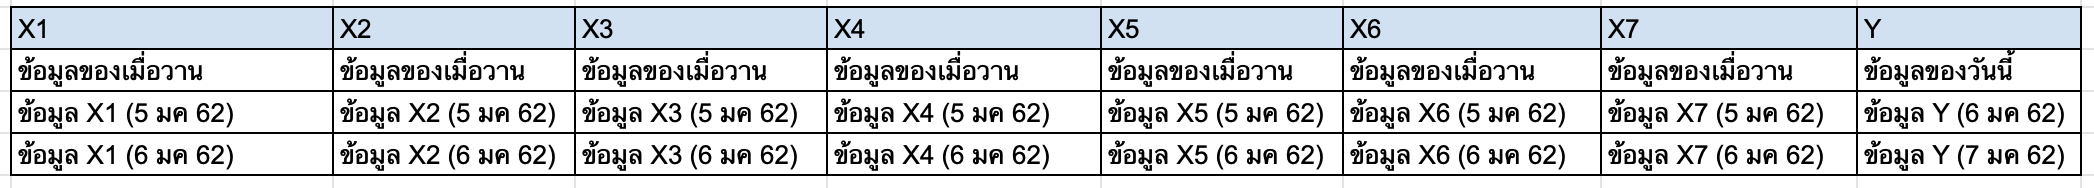



In [ ]:
weather_data = pd.read_csv('/content/drive/MyDrive/Data Prep and Data Mining BSc65/อุตุ/Group3_ณัฐธิดา_ศุภัสรา_เฉลิมเกียรติ_พิทวัส.csv')
weather_data.head()